In [52]:
from utils import *
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels
import numpy as np
from sklearn import metrics

### Prosody Feats

In [53]:
intensity = pd.read_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/NLS/Acoustic/Prosody/Harmonics.csv")
pros = pd.read_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/NLS/Acoustic/Prosody/prosody_last_meeting.csv")
pros['intensity'] = intensity['stddev_intensity'].tolist()
prosody = pros.drop(columns=['F0avg', 'F0max', 'F0min', 'F0kurt', 'F0skew',
'F0tiltavg',
'F0mseavg', 
'F0tiltstd',
'F0msestd',
'F0tiltmax',
'F0msemax',
'F0tiltmin',
'F0msemin',
'F0tiltskw',
'F0mseskw',
'F0tiltku',
'F0mseku',
'1F0mean',
'1F0max',
'1F0min',
'1F0skw',
'1F0ku',
'lastF0avg',
'lastF0std',
'lastF0max',
'lastF0min',
'lastF0skw',
'lastF0ku',
'avgEvoiced',
'stdEvoiced',
'skwEvoiced',
'kurtosisEvoiced',
'avgtiltEvoiced',
'stdtiltEvoiced',
'skwtiltEvoiced',
'kurtosistiltEvoiced',
'avgmseEvoiced',
'stdmseEvoiced',
'skwmseEvoiced',
'kurtosismseEvoiced',
'avg1Evoiced',
'std1Evoiced',
'max1Evoiced',
'min1Evoiced',
'skw1Evoiced',
'kurtosis1Evoiced',
'avglastEvoiced',
'stdlastEvoiced',
'maxlastEvoiced',
'minlastEvoiced',
'skwlastEvoiced',
'kurtosislastEvoiced',
'avgEunvoiced',
'stdEunvoiced',
'skwEunvoiced',
'kurtosisEunvoiced',
'avgtiltEunvoiced',
'stdtiltEunvoiced',
'skwtiltEunvoiced',
'kurtosistiltEunvoiced',
'avgmseEunvoiced',
'stdmseEunvoiced',
'skwmseEunvoiced',
'kurtosismseEunvoiced',
'avg1Eunvoiced',
'std1Eunvoiced',
'max1Eunvoiced',
'min1Eunvoiced',
'skw1Eunvoiced',
'kurtosis1Eunvoiced',
'avglastEunvoiced',
'stdlastEunvoiced',
'maxlastEunvoiced',
'minlastEunvoiced',
'skwlastEunvoiced',
'kurtosislastEunvoiced',
'Vrate',
'avgdurvoiced',
'stddurvoiced',
'skwdurvoiced',
'kurtosisdurvoiced',
'maxdurvoiced',
'mindurvoiced',
'avgdurunvoiced',
'stddurunvoiced',
'skwdurunvoiced',
'kurtosisdurunvoiced',
'maxdurunvoiced',
'mindurunvoiced',
'avgdurpause',
'stddurpause',
'skwdurpause',
'kurtosisdurpause',
'maxdurpause',
'mindurpause',
'PVU',
'PU',
'UVU',
'VVU',
'VP',
'UP'])

prosody['name']=prosody['id'].str.split('_ses').str[0]
prosody['task'] = prosody['id'].str.split('_', -1).str[3]
data_ = prosody
labels = pd.read_excel("/export/b14/afavaro/Acoustic_Features/DigiPsych_Prosody/Hospital_Analysis/Book3.xlsx")
label = labels['Label'].tolist()
speak = labels['Participant I.D.'].tolist() #id
spk2lab_ = {sp:lab for sp,lab in zip(speak,label)}
speak2__ = data_['name'].tolist()
etichettex = []
for nome in speak2__:
    if nome in spk2lab_.keys():
        lav = spk2lab_[nome]
        etichettex.append(([nome, lav]))
    else:
         etichettex.append(([nome, 'Unknown']))

label_new_ = []
for e in etichettex:
    label_new_.append(e[1])
data_['label'] = label_new_
label = labels['Age'].tolist()
speak = labels['Participant I.D.'].tolist()
spk2lab_ = {sp:lab for sp,lab in zip(speak,label)}
speak2__ = data_['name'].tolist()
etichettex = []
for nome in speak2__:
    if nome in spk2lab_.keys():
        lav = spk2lab_[nome]
        etichettex.append(([nome, lav]))
    else:
         etichettex.append(([nome, 'Unknown']))
label_new_ = []
for e in etichettex:
    label_new_.append(e[1])
data_['age'] = label_new_
data_ = data_.drop(columns=['Unnamed: 0', 'id'])

In [64]:
# Group by task
tot = data_.groupby('task')
rp = tot.get_group('RainbowPassage.wav')
ctp = tot.get_group('CookieThief.wav')
jk =  tot.get_group('Joke.wav')
pom = tot.get_group('Poem.wav')

## Rainbow passage (read passage)

In [65]:
grouped = rp.groupby("label") #here we extract the values by category
control = grouped.get_group("CTRL")
control = control[~control.name.str.contains("PEC_4")]
control = control[~control.name.str.contains("PEC_5")]
control = control[~control.name.str.contains("PEC_9")]
control = control[~control.name.str.contains("PEC_14")]
control = control[~control.name.str.contains("PEC_15")]
control = control[~control.name.str.contains("PEC_16")]
control = control[~control.name.str.contains("PEC_17")]
control = control[~control.name.str.contains("PEC_18")]
control = control[~control.name.str.contains("PEC_19")]
control = control[~control.name.str.contains("PEC_23")]
control = control[~control.name.str.contains("PEC_25")]
control = control[~control.name.str.contains("PEC_29")]
control = control[~control.name.str.contains("PEC_35")]

parkinson_ = grouped.get_group("PD")
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_116")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_35")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_20")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
task = rp.columns[:-4].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(rp.columns[:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(rp.columns[:-4])])

# Perform statistical analysis

with open('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/RP_energy.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

# perform FDR correction

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/RP_energy.txt')
holm_correction(kruskal_1)

(['kruskal results for F0std controls vs. parkinson 0.0004848277662283311 ',
  'kruskal results for intensity controls vs. parkinson 0.0027332234768987274 '],
 [0.0014544832986849935, 0.004099835215348091])

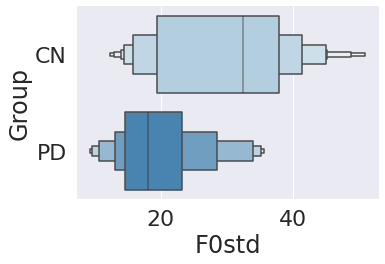

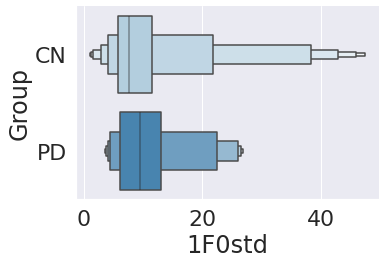

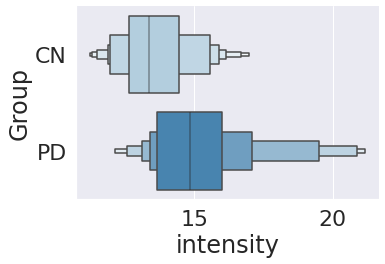

In [66]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

## Cookie Theft picture (spontaneous speech)

In [67]:
grouped = ctp.groupby("label") #here we extract the values by category
control = grouped.get_group("CTRL") 

control = control[~control.name.str.contains("PEC_4")]
control = control[~control.name.str.contains("PEC_5")]
control = control[~control.name.str.contains("PEC_9")]
control = control[~control.name.str.contains("PEC_14")]
control = control[~control.name.str.contains("PEC_15")]
control = control[~control.name.str.contains("PEC_16")]
control = control[~control.name.str.contains("PEC_17")]
control = control[~control.name.str.contains("PEC_18")]
control = control[~control.name.str.contains("PEC_19")]
control = control[~control.name.str.contains("PEC_23")]
control = control[~control.name.str.contains("PEC_25")]
control = control[~control.name.str.contains("PEC_29")]
control = control[~control.name.str.contains("PEC_35")]

control = control[~control.name.str.contains("PEC_41")]
control = control[~control.name.str.contains("PEC_55")]
control = control[~control.name.str.contains("PEC_64")]
control = control[~control.name.str.contains("PEC_61")]
control = control[~control.name.str.contains("PEC_67")]
control = control[~control.name.str.contains("PEC_68")]
parkinson_ = grouped.get_group("PD")
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_116")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_35")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_20")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
task = ctp.columns[:-4].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(ctp.columns[:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(ctp.columns[:-4])])

with open('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC//Results/ctp_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/ctp_new.txt')
holm_correction(kruskal_1)

(['kruskal results for F0std controls vs. parkinson 0.0018026404445666605 ',
  'kruskal results for intensity controls vs. parkinson 1.061054886229938e-05 '],
 [0.002703960666849991, 3.1831646586898146e-05])

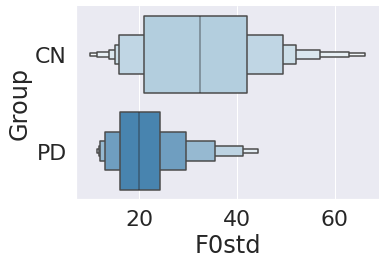

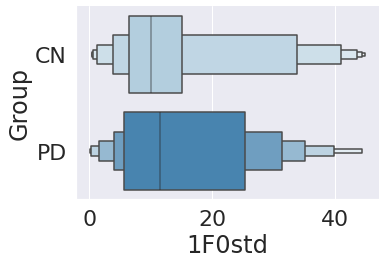

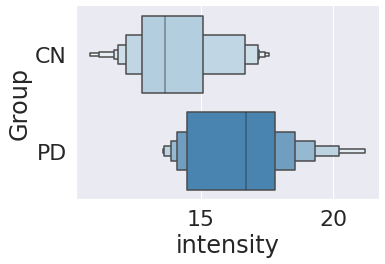

In [68]:
for i, title in enumerate(task):
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

## Joke (read passage)

In [69]:
grouped = jk.groupby("label")
control = grouped.get_group("CTRL") 
control = control[~control.name.str.contains("PEC_4")]
control = control[~control.name.str.contains("PEC_5")]
control = control[~control.name.str.contains("PEC_9")]
control = control[~control.name.str.contains("PEC_14")]
control = control[~control.name.str.contains("PEC_15")]
control = control[~control.name.str.contains("PEC_16")]
control = control[~control.name.str.contains("PEC_17")]
control = control[~control.name.str.contains("PEC_18")]
control = control[~control.name.str.contains("PEC_19")]
control = control[~control.name.str.contains("PEC_23")]
control = control[~control.name.str.contains("PEC_25")]
control = control[~control.name.str.contains("PEC_29")]
control = control[~control.name.str.contains("PEC_35")]

control = control[~control.name.str.contains("PEC_41")]

control = control[~control.name.str.contains("PEC_55")]
control = control[~control.name.str.contains("PEC_64")]
control = control[~control.name.str.contains("PEC_61")]
control = control[~control.name.str.contains("PEC_67")]
control = control[~control.name.str.contains("PEC_68")]
parkinson_ = grouped.get_group("PD")
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_116")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_35")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_20")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
task = jk.columns[:-4].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(jk.columns[:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(jk.columns[:-4])])

with open('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/jk_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/jk_new.txt')
holm_correction(kruskal_1)

(['kruskal results for F0std controls vs. parkinson 0.009680248070280686 ',
  'kruskal results for intensity controls vs. parkinson 0.018043592782942975 '],
 [0.027065389174414464, 0.027065389174414464])

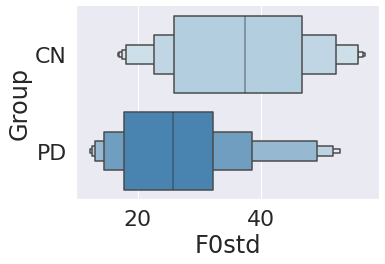

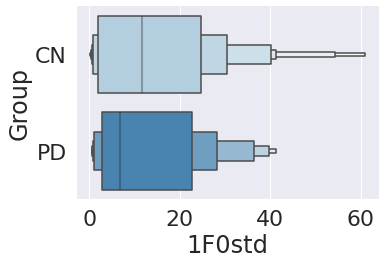

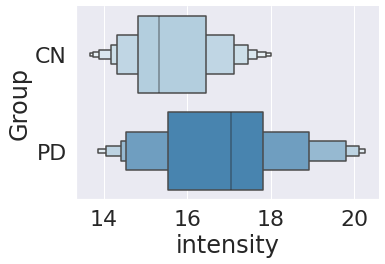

In [70]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

## Poem (Read passage)

In [71]:
#pom = pom.drop(columns='name')
grouped = pom.groupby("label") #here we extract the values by category
control = grouped.get_group("CTRL") 
control = control[~control.name.str.contains("PEC_4")]
control = control[~control.name.str.contains("PEC_5")]
control = control[~control.name.str.contains("PEC_9")]
control = control[~control.name.str.contains("PEC_14")]
control = control[~control.name.str.contains("PEC_15")]
control = control[~control.name.str.contains("PEC_16")]
control = control[~control.name.str.contains("PEC_55")]
control = control[~control.name.str.contains("PEC_64")]
control = control[~control.name.str.contains("PEC_61")]
control = control[~control.name.str.contains("PEC_67")]
control = control[~control.name.str.contains("PEC_68")]


parkinson_ = grouped.get_group("PD")
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_116")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_35")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_20")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]

task = pom.columns[:-4].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(pom.columns[:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(pom.columns[:-4])])

with open('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/pom_RHYTHM.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/pom_RHYTHM.txt')
holm_correction(kruskal_1)

(['kruskal results for intensity controls vs. parkinson 0.006020047102323066 '],
 [0.018060141306969202])

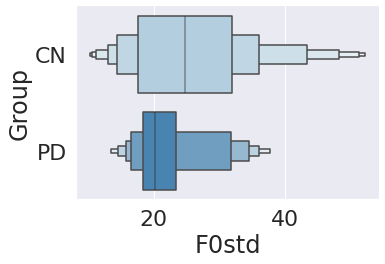

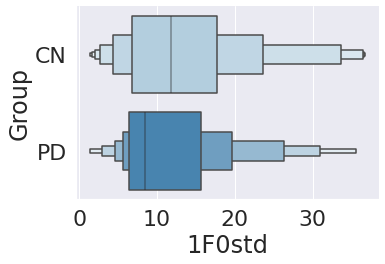

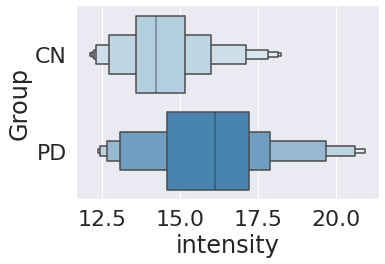

In [72]:
for i, title in enumerate(task):
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
